Подключаемся к Infura

In [ ]:
!pip install web3

In [187]:
from web3 import Web3 
from credentials import infuraUrl
web3 = Web3(Web3.HTTPProvider(infuraUrl))

In [ ]:
variantNumber = 8
firstBlock = 8961400 - 1000 * (variantNumber - 1)
lastBlock = 8961400 - 1000 * (variantNumber - 2)

Загружаем `gasPrice` и `gasUsed` всех транзакций в указанных блоках

In [113]:
%%time
gasPricesFile = open("gasPrices.txt", 'w')
gasUsedFile = open("gasUsed.txt", 'w')
gasPricesForEachTransactionInBlock = []
gasUsedForEachTransactionInBlock = []
for blockNumber in range(firstBlock, lastBlock+1):# including last block
    transactionsInBlock = web3.eth.getBlock(blockNumber)['transactions']
    for transactionNumber in transactionsInBlock:
        gasPrice = web3.eth.getTransaction(transactionNumber)['gasPrice']
        gasUsed = web3.eth.getTransactionReceipt(transactionNumber)['gasUsed']
        gasPricesForEachTransactionInBlock.append(gasPrice)
        gasUsedForEachTransactionInBlock.append(gasUsed)
    gasUsedFile.writelines(str(gasUsedForEachTransactionInBlock))
    gasUsedFile.write('\n')
    gasUsedForEachTransactionInBlock = []
    gasPricesFile.writelines(str(gasPricesForEachTransactionInBlock))
    gasPricesFile.write('\n')
    gasPricesForEachTransactionInBlock = []
gasPricesFile.close()
gasUsedFile.close()

CPU times: user 36min 2s, sys: 3min 30s, total: 39min 33s
Wall time: 12h 34min 14s


Считаем комиссию и полную награду майнера для каждого блока

In [2]:
import numpy as np
from ast import literal_eval

guaranteedReward = 2
fee = []
gasPricesFile = open("gasPrices.txt", 'r')
gasUsedFile = open("gasUsed.txt", 'r')
for i in range(1000):
    gasPricesLine = gasPricesFile.readline()
    gasUsedLine = gasUsedFile.readline()
    if gasPricesLine == '[]\n':
        continue
    gasPricesArray = np.array(literal_eval(gasPricesLine))
    gasUsedArray = np.array(literal_eval(gasUsedLine))
    fee.append(np.sum(gasPricesArray*gasUsedArray*(10**(-18))))

gasPricesFile.close()
gasUsedFile.close()
minersTotalReward = list(map(lambda x: x + guaranteedReward, fee))

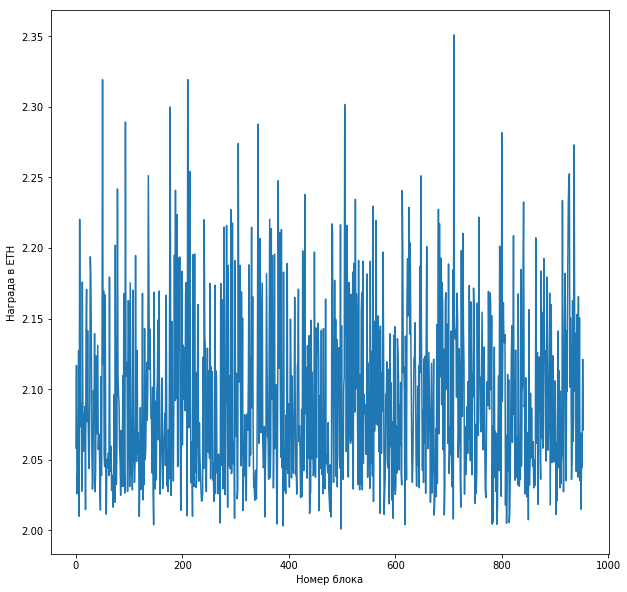

In [178]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,10))
plt.plot(minersTotalReward)
plt.ylabel('Награда в ETH')
plt.xlabel('Номер блока')
plt.show()

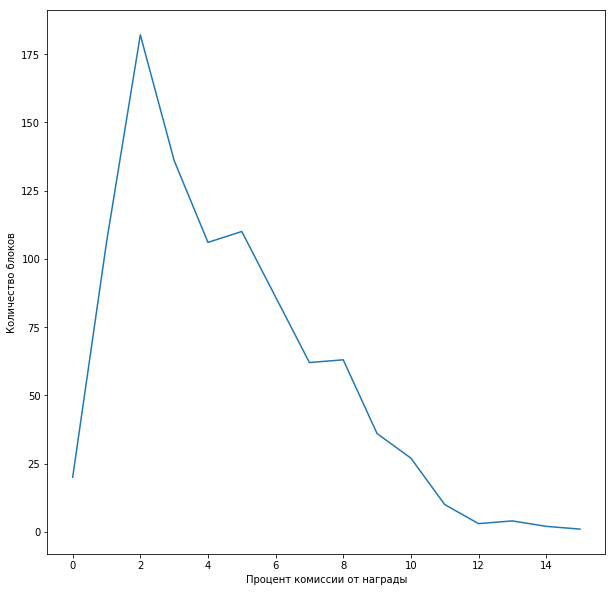

In [179]:
from collections import Counter
feePercentage = np.round(np.multiply(np.divide(fee, minersTotalReward), 100))
feePercentageToBlocks = Counter(feePercentage)
feePercentageToBlocks
x, y = zip(*sorted(feePercentageToBlocks.items())) #sort dictionary
plt.figure(figsize=(10,10))
plt.plot(x, y)
plt.ylabel('Количество блоков')
plt.xlabel('Процент комиссии от награды')
plt.show()

In [182]:
mean = np.mean(fee)
median = np.median(fee)
range = np.max(fee) - np.min(fee)
dispersion = np.var(fee)
std = np.std(fee)
print('Математическое ожидание: {} \nМедиана: {} \nРазмах: {} \nДисперсия: {}\nCреднеквадратичное отклонение: {}'.format(mean, median, range, dispersion, std))

Математическое ожидание: 0.09259915497738763 
Медиана: 0.07851884549426213 
Размах: 0.3498709916060831 
Дисперсия: 0.0037022681920378924
Cреднеквадратичное отклонение: 0.06084626687018598
